<a href="https://colab.research.google.com/github/Keishan1/pythoncodes/blob/main/Correlation_between_GDP_and_global_warming_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Keishan martin </center>
#<h4 align="center">December 21, 2021</h3> 
#<h4 align="center">Explanation: *(Find the correlation if any between a country's air and plastic pollution, energy usage and a country's GDP)*  </h3> 
___

In [1]:
#Import all the necessary libraries 
import requests
from bs4 import BeautifulSoup

import numpy as np

import pandas as pd

In [2]:
#defined the function definition to take parameter 'URLS'
def find_data (URLS):
  all_df = []
  for URL in URLS:
    page = requests.get(URL)

    soup = BeautifulSoup(page.content, 'html.parser')

    #find the table on the website being scraped, since for all websites there's only one table 
    table = soup.find('table')

    Country = []
    Data = []
    Population = []
    Country = []
    ISO2S = []
    ISO3S = []
    Numeric = []
    
    #if the table has 3 columns treat it was decribed in the if statement below
    for row in table.find_all('tr'):
      cells = row.findAll('td')
      if(len(cells) == 3):
        
        Country.append(cells[0].get_text())

        if len(cells[1].get_text()) == 0 :
          Data.append(np.nan)
        else:
          D1 = (cells[1].get_text())
          D2 = D1.replace(',','')
          Data.append(float(D2))

        Pop = (cells[2].get_text())
        Pop2 = Pop.replace(',','')
        Population.append(int(Pop2))

        This = {'Country': Country, 'data': Data, 'Population': Population } 

        df = pd.DataFrame(This)


      #if the table has 4 columns treat it was decribed in the if statement below
      else:
        if (len(cells) == 4):
          
          Country.append(cells[0].get_text())

          ISO2S.append(cells[1].get_text())

          ISO3S.append(cells[2].get_text())

          Numeric.append(cells[3].get_text())

          This = {'Country': Country, 'Alpha_2_code': ISO2S, 'Alpha_3_code': ISO3S , 'Numeric' : Numeric} 

          df = pd.DataFrame(This)

          


    return df

In [3]:
#websites being scraped
Energy = ['https://worldpopulationreview.com/country-rankings/energy-consumption-by-country']
Air = ['https://worldpopulationreview.com/country-rankings/most-polluted-countries']
Plastic = ['https://worldpopulationreview.com/country-rankings/plastic-pollution-by-country']
Cod = ['https://www.iban.com/country-codes']



In [4]:
#calling the find_data function to each website
Energy_Usage = find_data(Energy)
Air_Pollution = find_data(Air)
Plastic_waste = find_data(Plastic)
Code = find_data(Cod)


In [5]:
#Merging the data frames together  
result = pd.merge(Energy_Usage, Air_Pollution, how='outer', on=['Country','Population'])
result2 = pd.merge(result, Plastic_waste, how='outer', on=['Country','Population'])
DF2 = pd.merge(result2, Code, how='left', on=['Country'])

In [6]:
#remove all nann cells since it was skewing my data 
DF2.dropna(inplace=True)

In [7]:
#name the columns 
DF2.columns = ['Country', 'Energy Usage', 'Population', 'Air Pollution','Plastic Waste', 'Alpha_2_code','Alpha_3_code','Numeric']

In [8]:
DF2

,Country,Energy Usage,Population,Air Pollution,Plastic Waste,Alpha_2_code,Alpha_3_code,Numeric
0,Iceland,53832.0,343353,5.55,32620.0,IS,ISL,352
1,Norway,23000.0,5465630,6.88,499682.0,NO,NOR,578
2,Bahrain,19597.0,1748296,46.80,59785.0,BH,BHR,048
3,Kuwait,15591.0,4328550,38.30,750690.0,KW,KWT,414
4,Canada,15588.0,38067903,7.72,1154309.0,CA,CAN,124
...,...,...,...,...,...,...,...,...
118,Bangladesh,320.0,166303498,83.30,1888170.0,BD,BGD,050
119,Angola,312.0,33933610,15.90,528843.0,AO,AGO,024
122,Cambodia,271.0,16946438,21.10,344698.0,KH,KHM,116
125,Myanmar,215.0,54806012,31.00,1373018.0,MM,MMR,104


In [9]:
#I was able to remove the unneeded data once everything was megerd, a list
#can now be created to only make calls for the relevant datas from my data set,
#so I created a list from s specific column within the dataframe  
countries = DF2['Alpha_3_code'].to_list()

In [10]:
#import requests and json
import requests
import json

In [11]:
#List each data will be appened to after 
#a request is made to the api
Country = []
GDP_2020 = []
GDP_2019 = []

#Make a call using each listed item in the countries list
#and append them to there corresponding list,
#int is stated to turn certain columns into intergers to be
#able to describe method
for country in countries:
  url= f'http://api.worldbank.org/v2/countries/{country}/indicators/NY.GDP.MKTP.CD?format=json'
  r = requests.get(url)
  data = r.json()
  if(r.status_code == 200):
    Country.append(data[1][0]['country']['value'])
    GDP_2020.append(int(data[1][0]['value']))
    GDP_2019.append(int(data[1][1]['value']))

In [12]:
#To create the data frame
GDP = pd.DataFrame()

#To name each column and state the list the column will get its numbers from 
GDP['Country'] = Country
GDP['GDP 2020'] = GDP_2020
GDP['GDP 2019'] = GDP_2019

In [13]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
DF3 = pd.merge(DF2, GDP, how='outer', on=['Country'])



In [14]:
DF3.sort_index(axis=1, ascending=True, inplace = True)
DF3.sort_values('GDP 2020', ascending=False, inplace = True)


In [15]:
DF3

,Air Pollution,Alpha_2_code,Alpha_3_code,Country,Energy Usage,GDP 2019,GDP 2020,Numeric,Plastic Waste,Population
29,39.12,CN,CHN,China,3927.00,14279937467431.00,14722730697890.00,156,59079741.00,1444216107.00
11,11.36,JP,JPN,Japan,7820.00,5148781948478.00,5057758958706.00,392,7993489.00,126050804.00
13,11.01,DE,DEU,Germany,7035.00,3888326788627.00,3846413928653.00,276,14476561.00,83900473.00
52,58.08,IN,IND,India,805.00,2870504096717.00,2660245248867.00,356,4493080.00,1393409038.00
14,12.34,FR,FRA,France,6940.00,2728870246705.00,2630317731455.00,250,4557128.00,65426179.00
...,...,...,...,...,...,...,...,...,...,...
0,5.55,IS,ISL,Iceland,53832.00,24857740445.00,21718075725.00,352,32620.00,343353.00
38,20.10,GE,GEO,Georgia,2694.00,17477255562.00,15846489610.00,268,97443.00,3979765.00
23,9.40,MT,MLT,Malta,4925.00,15215714309.00,14647384607.00,470,32377.00,442784.00
17,20.30,HK,HKG,Hong Kong,6083.00,nan,nan,344,1020406.00,7552810.00


In [16]:
#generats a csv file, with data
DF3.to_csv('Data.csv')

In [17]:
print('Countries are listed by below from the highest to the lowest GPD')
DF3.head(10)

Countries are listed by below from the highest to the lowest GPD


,Air Pollution,Alpha_2_code,Alpha_3_code,Country,Energy Usage,GDP 2019,GDP 2020,Numeric,Plastic Waste,Population
29,39.12,CN,CHN,China,3927.00,14279937467431.00,14722730697890.00,156,59079741.00,1444216107.00
11,11.36,JP,JPN,Japan,7820.00,5148781948478.00,5057758958706.00,392,7993489.00,126050804.00
13,11.01,DE,DEU,Germany,7035.00,3888326788627.00,3846413928653.00,276,14476561.00,83900473.00
52,58.08,IN,IND,India,805.00,2870504096717.00,2660245248867.00,356,4493080.00,1393409038.00
14,12.34,FR,FRA,France,6940.00,2728870246705.00,2630317731455.00,250,4557128.00,65426179.00
22,17.09,IT,ITA,Italy,5002.00,2009383867307.00,1888709443687.00,380,2899258.00,60367477.00
4,7.72,CA,CAN,Canada,15588.00,1741576393905.00,1644037286481.00,124,1154309.00,38067903.00
39,15.77,BR,BRA,Brazil,2620.00,1877824273720.00,1444733258971.00,076,11852055.00,213993437.00
7,8.00,AU,AUS,Australia,10071.00,1391952510370.00,1327836171068.00,036,900658.00,25788215.00
20,9.74,ES,ESP,Spain,5356.00,1393046093137.00,1281484640043.00,724,4709157.00,46745216.00


In [18]:
DF3.describe()

,Air Pollution,Energy Usage,GDP 2019,GDP 2020,Plastic Waste,Population
count,62.00,62.00,62.00,62.00,62.00,62.00
mean,20.95,5775.55,839003941476.52,811323771024.27,3049326.18,89696074.39
std,14.76,7864.64,1983094875453.83,2019729429778.08,7752129.17,252071558.16
min,5.55,145.00,15215714309.00,14647384607.00,32377.00,343353.00
25%,11.10,1452.75,78762748135.50,78166485780.00,384716.25,5834145.00
50%,18.84,3850.50,290978403894.50,270594454573.50,1021544.50,23642762.50
75%,22.50,6699.25,542020058839.00,536380367740.75,2862831.00,58732998.50
max,83.30,53832.00,14279937467431.00,14722730697890.00,59079741.00,1444216107.00


In [19]:
#importing pandas
import pandas as pd

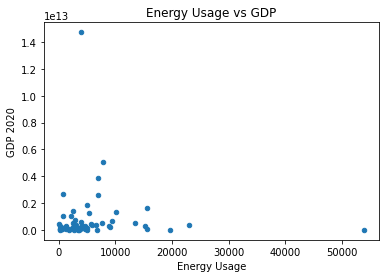

In [20]:
DF3.plot(x="Energy Usage", y = "GDP 2020", title="Energy Usage vs GDP", kind="scatter")

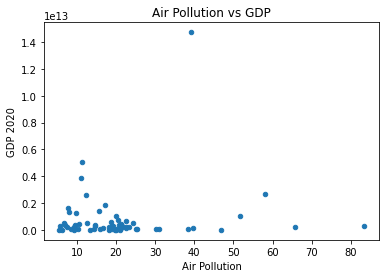

In [21]:
DF3.plot(x="Air Pollution", y = "GDP 2020", title="Air Pollution vs GDP", kind="scatter")

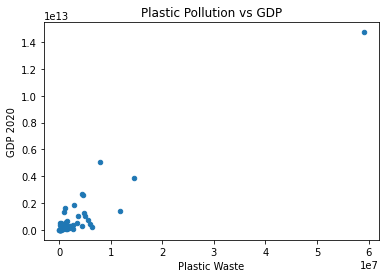

In [22]:
DF3.plot(x="Plastic Waste", y = "GDP 2020", title="Plastic Pollution vs GDP", kind="scatter")